In [1]:
from pathlib import Path
import os
compe='digit-recognizer'
iskaggle= os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
if iskaggle:
    path=Path(f'../input/{compe}')
    ! pip install -Uqq fastai
else:
    import kaggle,zipfile
    path=Path(f'{compe}')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
!cd digit-recognizer; ls

data                  test.csv
sample_submission.csv train.csv


In [3]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [4]:
df=pd.read_csv(f'{compe}/train.csv')
df_test=pd.read_csv(f'{compe}/test.csv')
df_sub=pd.read_csv(f'{compe}/sample_submission.csv')

In [5]:
print('shape of train:',df.shape)
print('shape of test:',df_test.shape)

shape of train: (42000, 785)
shape of test: (28000, 784)


In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [68]:
from fastai import *
from fastai.vision import *

In [10]:
import os
from pathlib import Path

In [13]:
inp=Path(compe)
os.listdir(inp)

['test.csv', 'train.csv', 'sample_submission.csv']

In [16]:
train_df=pd.read_csv(inp/'train.csv')
test_df=pd.read_csv(inp/'test.csv')

In [17]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Wrangling

In [7]:
TRAIN=Path('digit-recognizer/data/train')
TEST=Path('digit-recognizer/data/test')

In [26]:
for i in range(10):
    try:
        os.makedirs(TRAIN/str(i))
    except:
        pass

In [28]:
for i in range(10):
    try:
        os.makedirs(TEST/str(i))
    except:
        pass

In [11]:
sorted(os.listdir(TEST))

['0',
 '0.jpg',
 '1',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',


In [12]:
from PIL import Image

In [46]:
def save_dig(dig,filepath):
    digit=dig.reshape(28,28)
    digit=digit.astype(np.uint8)
    img=Image.fromarray(digit)
    img.save(filepath)

In [47]:
for index,row in train_df.iterrows():
    label,digit=row[0],row[1:]
    filename=f'{index}.jpg'
    folder=TRAIN/str(label)
    filepath=folder/filename
    digit=digit.values
    save_dig(digit,filepath)

In [52]:
for index,row in test_df.iterrows():
    filename=f'{index}.jpg'
    folder=TEST
    filepath=folder/filename
    digit=row.values
    save_dig(digit,filepath)

In [13]:
import matplotlib.pyplot as plt

def DisplayTrainingData():
    fig=plt.figure(figsize=(5,10))
    
    for rowindex in range(1,10):
        path=TRAIN/str(rowindex)
        images=os.listdir(path)
        for sindex in range(1,6):
            rn=random.randint(0,len(images)-1)
            image=Image.open(path/images[rn])
            ax=fig.add_subplot(10, 5, 5*rowindex + sindex)
            ax.axis('off')
            plt.imshow(image,cmap='gray')
    plt.show()

samples of training data


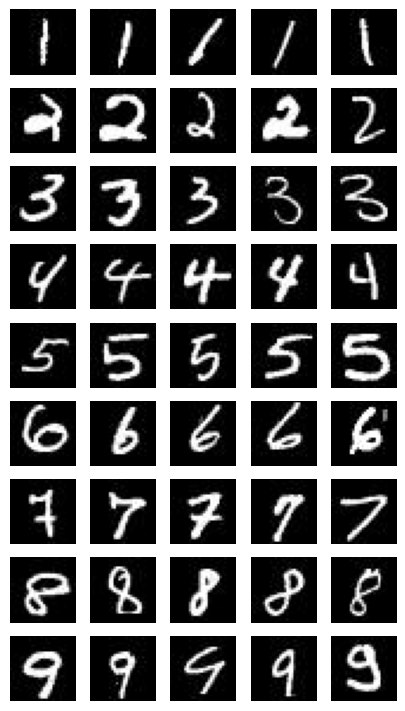

In [29]:
print('samples of training data')
DisplayTrainingData()

In [35]:
trn_path = 'digit-recognizer/data/train'
files = get_image_files('digit-recognizer/data/train')

In [32]:
from fastai.vision.all import *
set_seed(42)

path.ls()

(#5) [Path('digit-recognizer/.DS_Store'),Path('digit-recognizer/test.csv'),Path('digit-recognizer/train.csv'),Path('digit-recognizer/data'),Path('digit-recognizer/sample_submission.csv')]

In [33]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

(28, 28)


In [34]:

from fastcore.parallel import *

def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

(28, 28)    42000
dtype: int64

In [41]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

In [42]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,
    batch_tfms=aug_transforms(size=28, min_scale=0.75))

dls.show_batch(max_n=6)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [43]:
python -c "import torch; print(torch.__version__)"

SyntaxError: invalid syntax (609037931.py, line 1)

In [44]:
print(torch.__version__)

2.0.1


In [45]:
import torch
x = torch.rand(5, 3)
print(x)


tensor([[0.0960, 0.7605, 0.6922],
        [0.1730, 0.8286, 0.9733],
        [0.2084, 0.8181, 0.8224],
        [0.0481, 0.0339, 0.1928],
        [0.8401, 0.4546, 0.8900]])


In [76]:
from fastai.vision.augment import aug_transforms
tfms = aug_transforms(do_flip=False)
from fastai.vision.data import *

In [82]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 get_y=parent_label,
                 splitter=RandomSplitter(valid_pct=0.2),
                 batch_tfms=tfms)


In [83]:
data

In [86]:
mnist_stats = ([0.1307], [0.3081])

In [87]:
data.normalize(mnist_stats)

AttributeError: module 'fastai.vision.data' has no attribute 'normalize'

In [92]:
from fastai.vision.learner import Learner

model = models.resnet18

learn = Learner(data, model, metrics=accuracy)

learn.fit_one_cycle(10)


NameError: name 'models' is not defined